# Exercise 2: Overview plot and analysis

### figure:

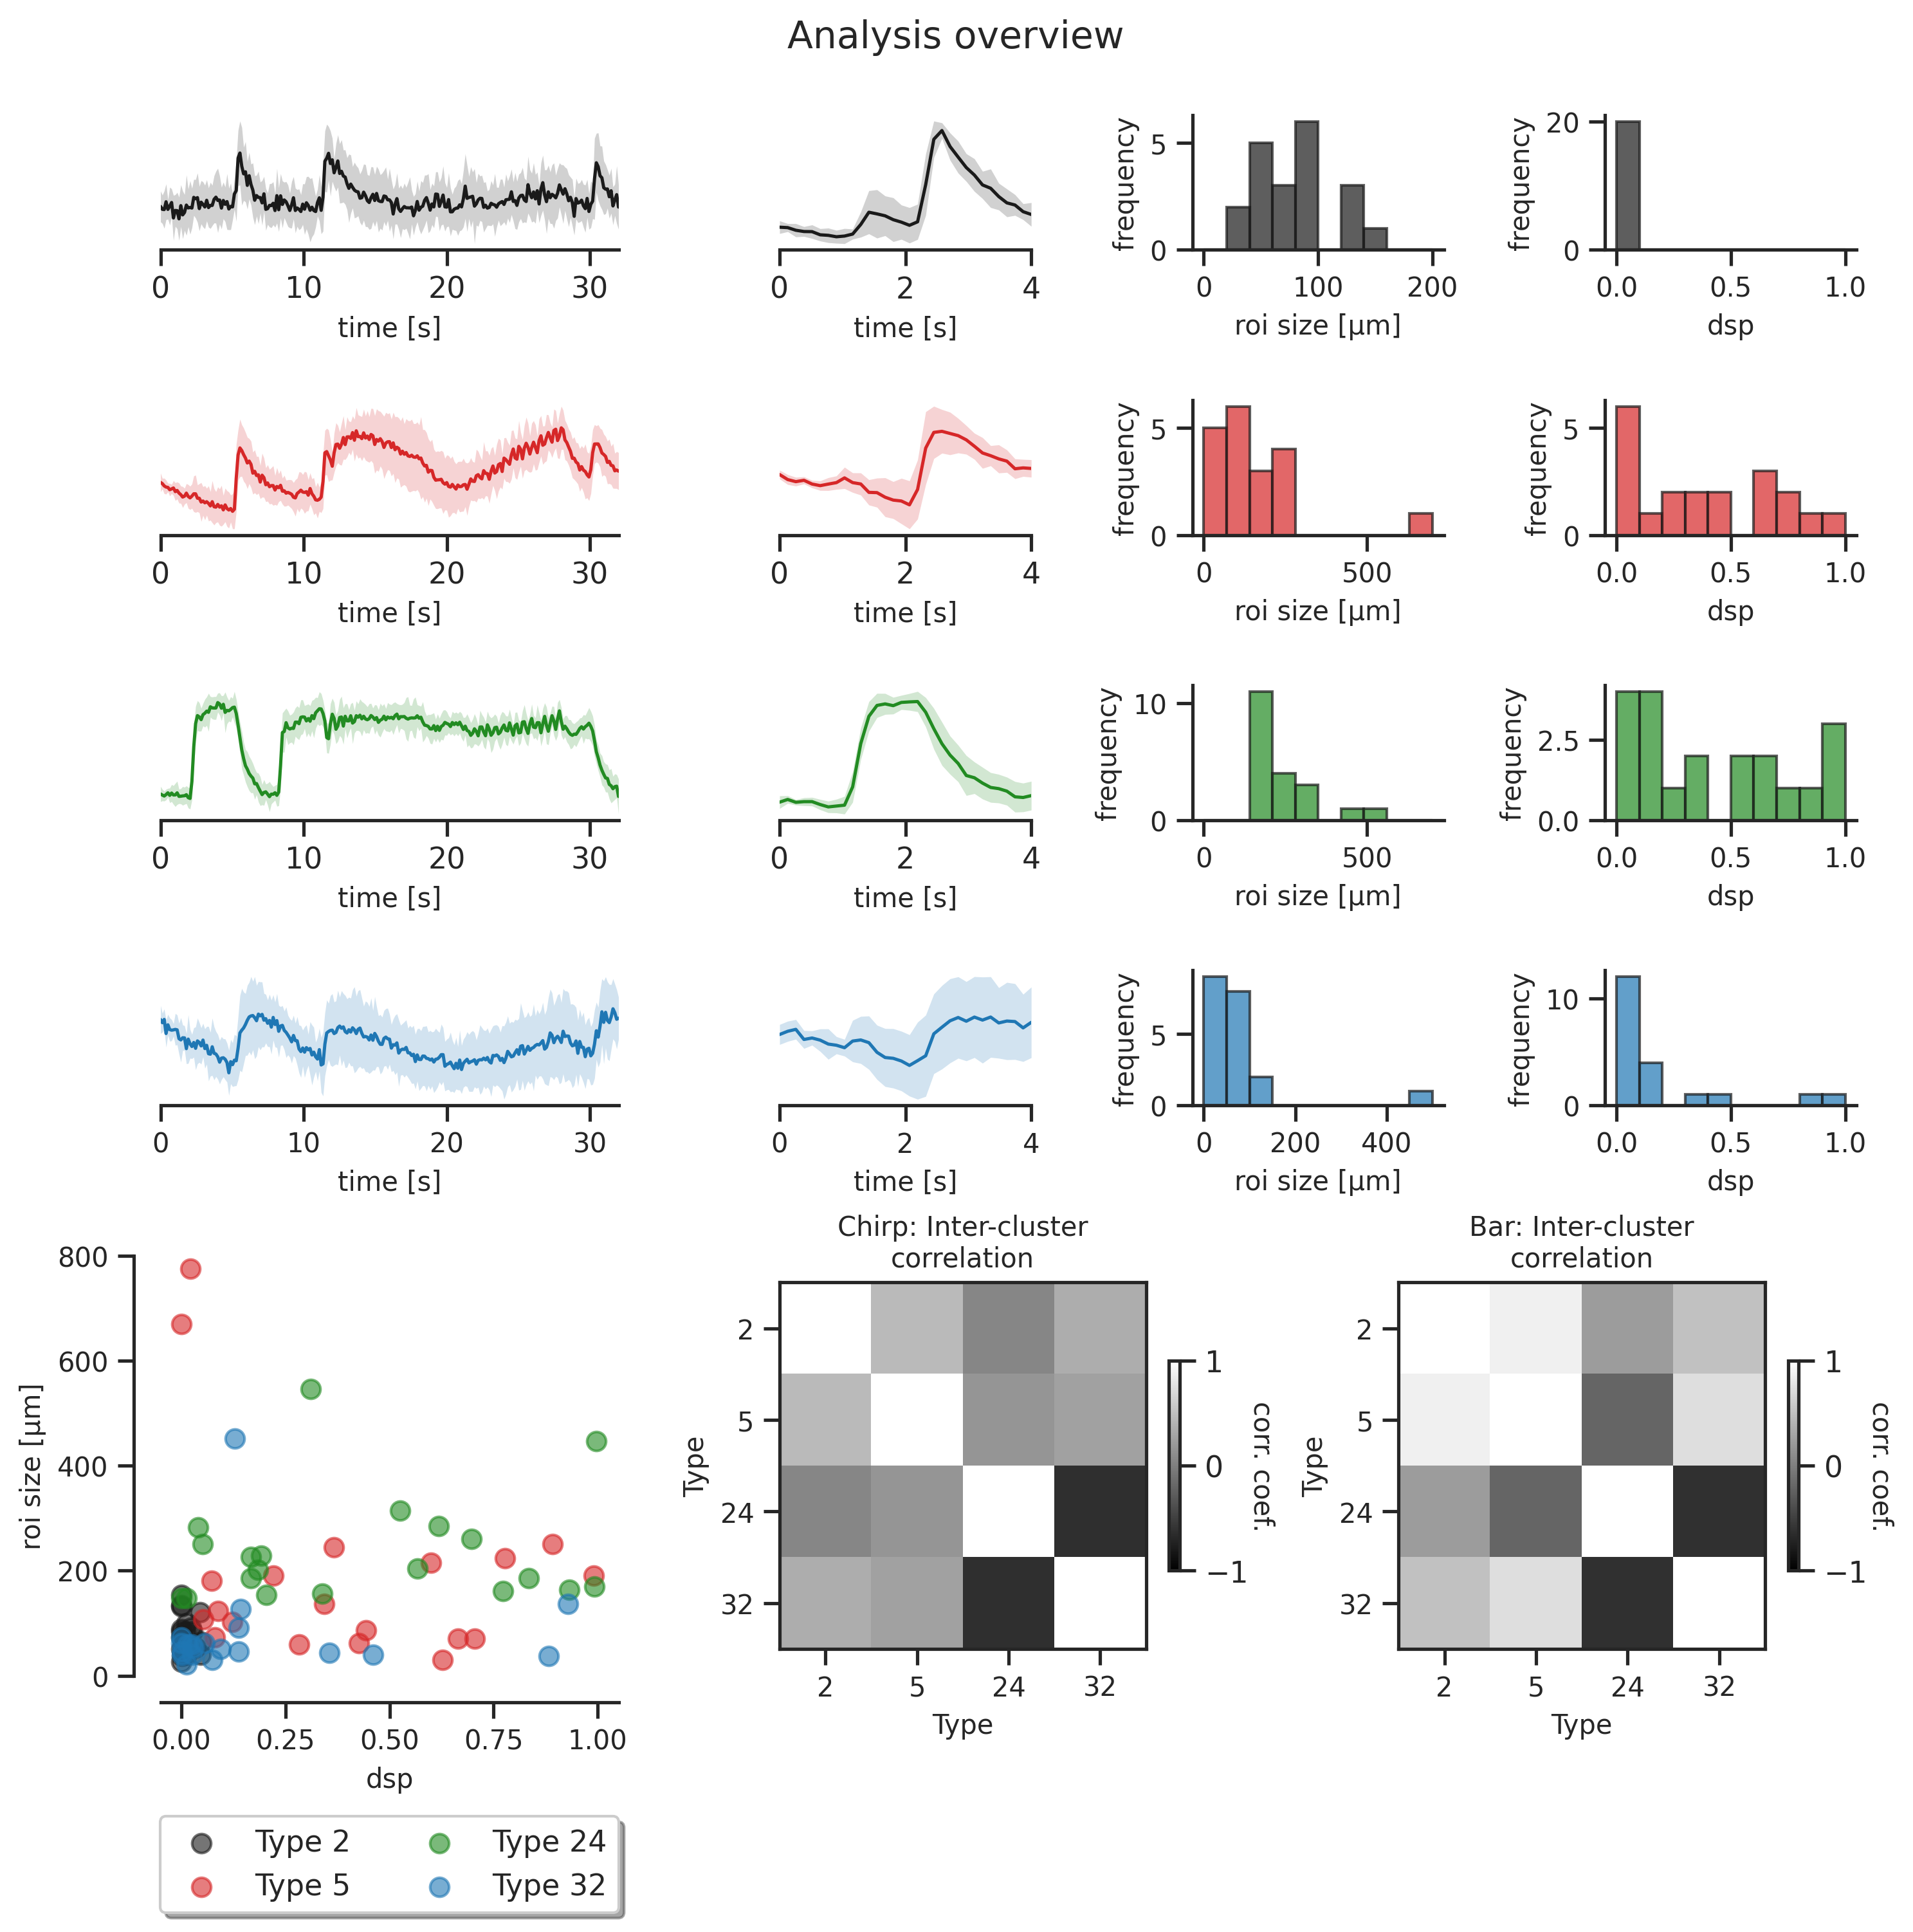

In [15]:
from IPython.display import Image
Image("/gpfs01/euler/User/dgonschorek/Github/python_course/day4_mpl/exercise_2_analysis_overview.png")
#Image(YourPath); use import os libaray

## import

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

## load dataset

In [3]:
# load data
#with open('/gpfs01/euler/User/dgonschorek/Github/python_course/day4_mpl/data/dict_rgc_data_exercise_2.pickle', 'rb') as handle:
#    rgc_dataset = pickle.load(handle)

In [3]:
# load data
with open('YourPath/dict_rgc_data_exercise_2.pickle', 'rb') as handle:
    rgc_dataset = pickle.load(handle)

In [4]:
rgc_dataset.keys()

dict_keys(['chirp', 'bar', 'roi_size', 'dsp', 'label'])

- the dataset contains visual light responses from 4 different retinal ganglion cell types in response to the chirp and moving bar responses
- additionally, there are 2 other features provided for every of those cells (soma size and dsp (p-value of permutation test if a cell is direction selective or not; dsp<0.05 = direction selective))
- each type comprises 20 cells (4 x 20 = 80 cells in total from 4 types)
- frame rate of recording is 7.81Hz, thus the chirp has 249 frames as it was displayed for approx. 32s (32s*7.81Hz=~249 frames); the moving bar was presented for 4s.

## helper function: intercluster correlation

In [48]:
def compute_intercluster_correlation(mean_responses):
    '''
    Input:
    mean_responses: n_types X n_time_points
    '''
    inter_corr = np.zeros((mean_responses.shape[0],mean_responses.shape[0]))
    for i in range(mean_responses.shape[0]):
        for j in range(mean_responses.shape[0]):
            inter_corr[i,j] = np.corrcoef(mean_responses[i,:],mean_responses[j,:])[0,1]
    return inter_corr

## enter code here